# 递归神经网络

## 为什么需要序列模型
序列数据举例
- 语言识别：输入、输出
- 音乐生成：输出
- 语义识别：输入
- 实体识别：输入
- 机器翻译：输入、输出
- 文本生成：输入、输出

## 单词表示方法
one-hot编码
- 定义：由一个只含一个1，其余都是0的向量表示一个单词
- 如何
    - 建立词表，每个单词对应一个序号
    - 根据序号创建one-hot编码

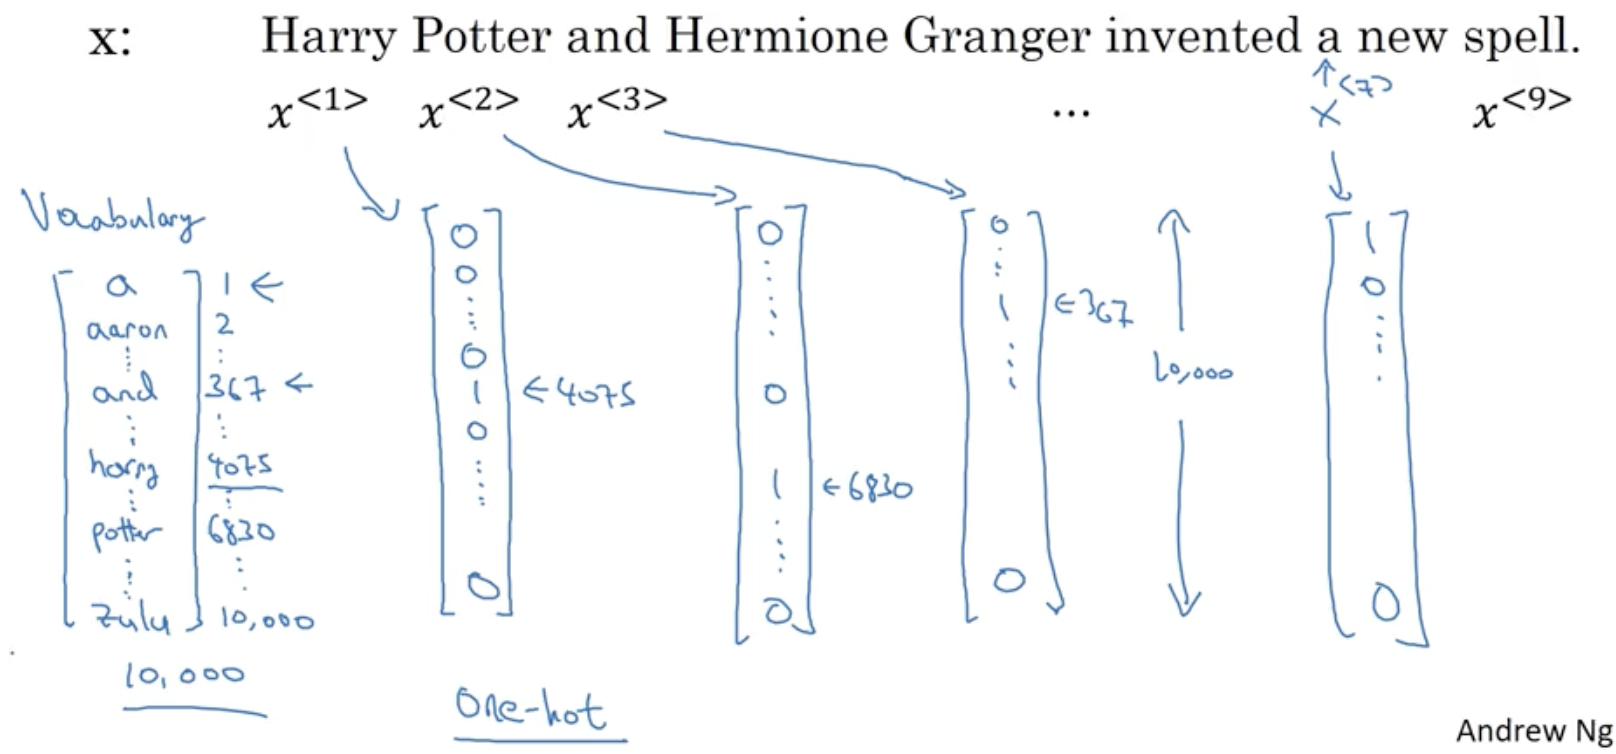

📌 $x^{<t>}$表示x序列中的第t个元素，$T_x$表示x序列的长度；对于不在词表中的单词，可用unknown或其他特殊符号表示

## RNN
为什么标准的神经网络不再适用
- 输入和输出长度不确定
- 不会从文本位置中学习到特征

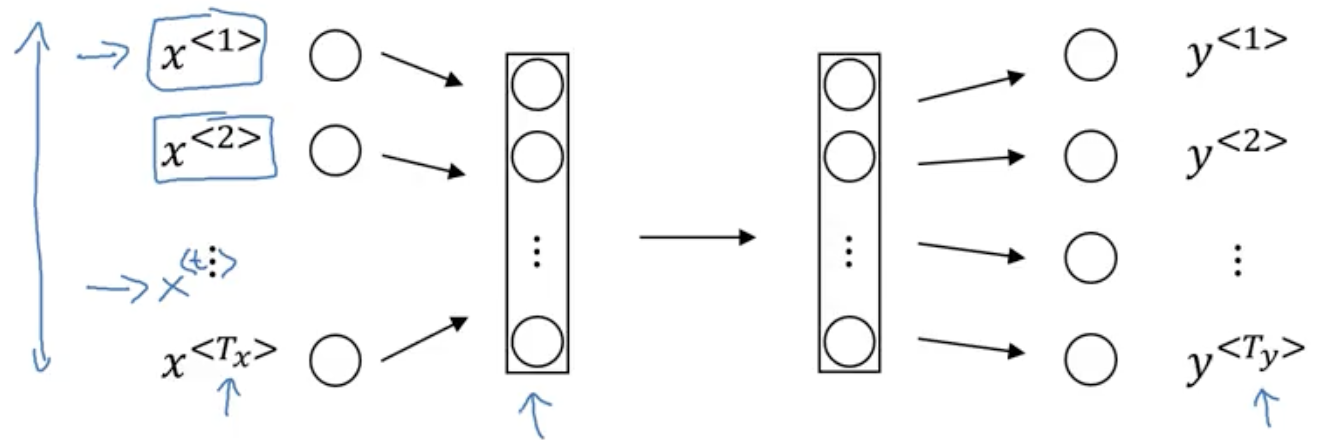

RNN前向传递
- 输入$x^{<1>}$，输出$\hat{y}^{<1>}$
- 输入$x^{<2>}、a^{<1>}$，输出$\hat{y}^{<2>}$
- 输入$x^{<3>}、a^{<2>}$，输出$\hat{y}^{<3>}$
- ......

$$
a^{<1>} = g1(W_{aa}a^{<0>} + W_{ax}x^{<1>} + b_a)
$$
$$
\hat{y}^{<1>} = g2(W_{ya}a^{<1>} + b_y)
$$

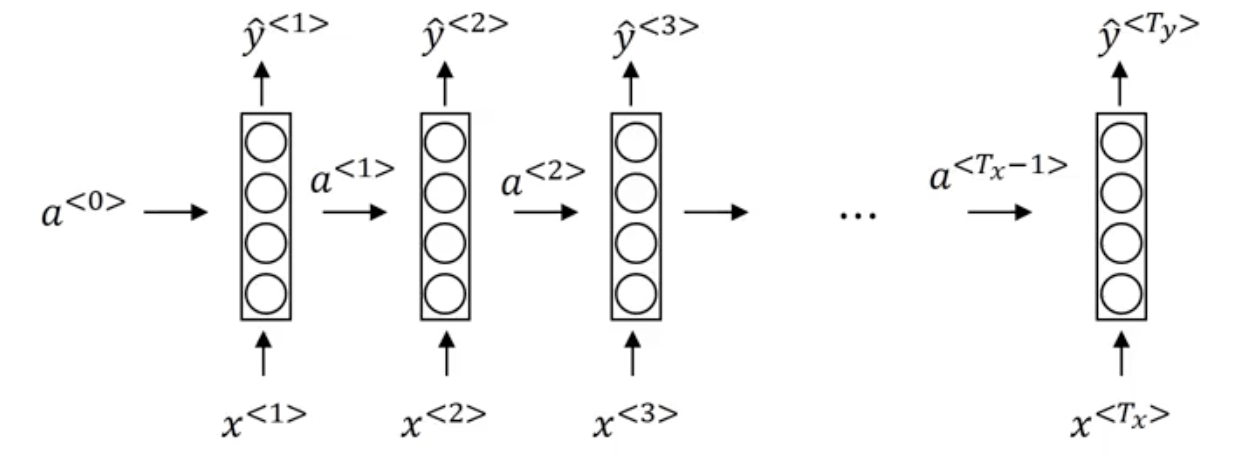

- g1通常使用tanh、relu
- g2根据场景选择，比如二分类场景使用sigmod
- 为了充分利用矢量化，可以横向堆叠$W_{aa}、W_{ax}$，纵向堆叠$a_{<t-1>}、x_{<t>}$

$$
W_a = \begin{bmatrix}
W_{aa} & W_{ax}
\end{bmatrix},  
\begin{bmatrix}
a_{<t-1>} & x_{<t>}
\end{bmatrix} =
\begin{bmatrix}
a^{<t - 1>} \\
x^{<t>}
\end{bmatrix}
$$

- 最终等式为
$$
a^{<t>} = g_1(W_a \begin{bmatrix}
a^{<t - 1>} \\
x^{<t>}
\end{bmatrix} + b_a)
$$

📌 为了保证计算统一，第一次计算会使用零值向量作为$a^{<0>}$

RNN的缺点
- $\hat{Y}^{<t>}$只能理解前t个输入，这在语义上存在缺陷，比如`He said, "Teddy Roosevelt was a great President."`和`He said, "Teddy bears are on sale!"`中，仅理解前三个单词，无法判断`Teddy`是人还是动物

## RNN不同变种
- 1 to 1：$T_x = T_y = 1$
- 1 to m：$T_x = 1$（音乐生成）
- m to 1：$T_y = 1$（情感标注）
- m to m：$T_x = T_y$（实体识别）
- m to m：$T_x != T_y$（机器翻译）

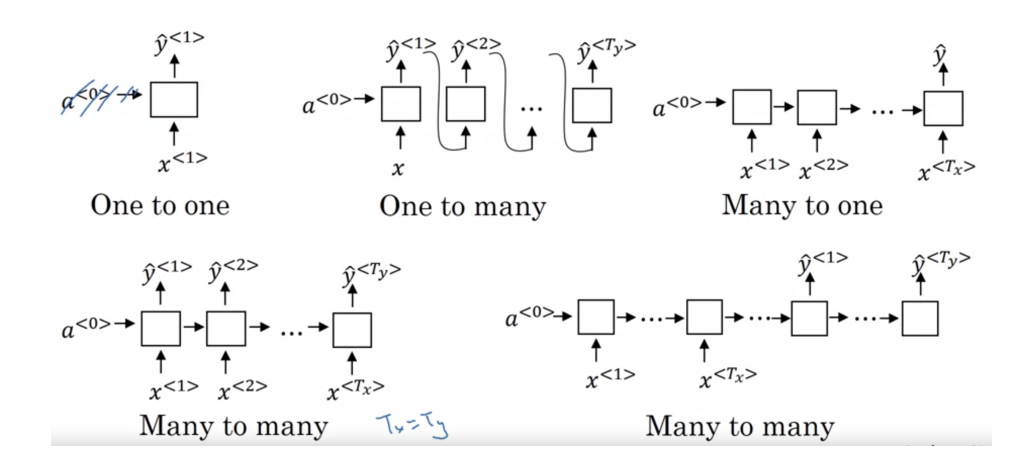